<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Determine-NA-tolerance-for-baseline-dataset" data-toc-modified-id="Determine-NA-tolerance-for-baseline-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Determine NA tolerance for baseline dataset</a></span></li><li><span><a href="#drop-some-unnecessary-attributes" data-toc-modified-id="drop-some-unnecessary-attributes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>drop some unnecessary attributes</a></span><ul class="toc-item"><li><span><a href="#Drop-attributes-with->50%-missing-values-for-sure." data-toc-modified-id="Drop-attributes-with->50%-missing-values-for-sure.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Drop attributes with &gt;50% missing values for sure.</a></span></li><li><span><a href="#drop-prescription-related-attributes" data-toc-modified-id="drop-prescription-related-attributes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>drop prescription related attributes</a></span></li><li><span><a href="#drop-attributes->20%-or->30%-missing-values" data-toc-modified-id="drop-attributes->20%-or->30%-missing-values-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>drop attributes &gt;20% or &gt;30% missing values</a></span><ul class="toc-item"><li><span><a href="#What-attributes-are-dropped-from-0.18---0.29" data-toc-modified-id="What-attributes-are-dropped-from-0.18---0.29-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>What attributes are dropped from 0.18 - 0.29</a></span></li></ul></li><li><span><a href="#drop-&quot;POST_&quot;-attributes" data-toc-modified-id="drop-&quot;POST_&quot;-attributes-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>drop "POST_" attributes</a></span></li><li><span><a href="#drop-unnecessary-attributres" data-toc-modified-id="drop-unnecessary-attributres-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>drop unnecessary attributres</a></span></li><li><span><a href="#NA-tolerance-0.20-and-0.30" data-toc-modified-id="NA-tolerance-0.20-and-0.30-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>NA tolerance 0.20 and 0.30</a></span></li><li><span><a href="#drop-&quot;_DAYS&quot;-attributes-for-now" data-toc-modified-id="drop-&quot;_DAYS&quot;-attributes-for-now-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>drop "_DAYS" attributes for now</a></span></li></ul></li><li><span><a href="#Save-'Filtered-Attrributes-Baseline'-excel-file" data-toc-modified-id="Save-'Filtered-Attrributes-Baseline'-excel-file-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save 'Filtered Attrributes Baseline' excel file</a></span></li><li><span><a href="#Proportion-needs-to-be-imputed" data-toc-modified-id="Proportion-needs-to-be-imputed-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Proportion needs to be imputed</a></span></li></ul></div>

In [186]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.options.display.max_rows = 400
pd.options.display.max_columns = 50

# Import data 
Patients from the cohort and their admissions up to 15th admission.

In [187]:
%cd ~/desktop/HF_Research/datasets

baseline = pd.read_excel('Advanced Therapy Potential Cohort.xlsx', 'cohort baseline')

/Users/jinchenxie/Desktop/HF_Research/datasets


In [188]:
admission = pd.read_excel('Advanced Therapy Potential Cohort.xlsx', 'admission (upto 15th)')

In [189]:
baseline.drop(columns=['Unnamed: 0'], inplace=True)

In [190]:
admission.drop(columns=['Unnamed: 0'], inplace=True)

In [191]:
baseline.shape

(2521, 289)

In [192]:
admission.shape

(12525, 174)

# Determine NA tolerance for baseline dataset

First, let's see if there are any patients with a large portion of NA values (>90% NA)  
If there are, we would like to remove these patients first.

In [193]:
patients_NA = []
for i in range(len(baseline.index)) :
    patients_NA.append(baseline.iloc[i].isna().sum()/(len(baseline.iloc[0])-1))
#     print("rID", baseline.iloc[i,0] , " : " ,  baseline.iloc[i].isnull().sum()/(len(baseline.iloc[0])-1))

In [194]:
for j in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]:
    temp_list = [i for i in patients_NA if i>j]
    print('cut-off=', j, ": ", len(temp_list))

cut-off= 0.9 :  0
cut-off= 0.8 :  0
cut-off= 0.7 :  0
cut-off= 0.6 :  0
cut-off= 0.5 :  8
cut-off= 0.4 :  171


In [195]:
# patients index for patients who have more than 50% missing values
[index for index,i in enumerate(patients_NA) if i>0.5]

[282, 307, 899, 1250, 1456, 1537, 1736, 2416]

There's no patients with more than 60% missing values in baseline records.  
There are 8 patients with more than 50% missing values, however, they have full history, comorbidities, and other demographic information.  
So I decided not to remove any patients at this stage.

In [196]:
cutoffs = np.arange(1,31,1)/100

In [197]:
cutoffs_broad = np.arange(1,51,1)/100

In [198]:
baseline_na_series = baseline.isna().sum()/baseline.shape[0]

In [199]:
num_attri_remain = []
for i in cutoffs:
    num_attri_remain.append(baseline.shape[1]-len(baseline_na_series[baseline_na_series>=i]))

In [200]:
num_attri_remain_broad = []
for i in cutoffs_broad:
    num_attri_remain_broad.append(baseline.shape[1]-len(baseline_na_series[baseline_na_series>=i]))

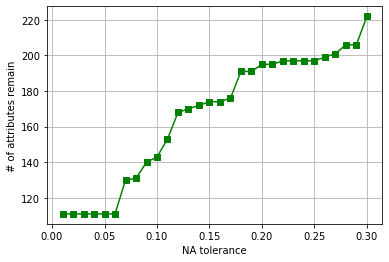

In [201]:
plt.plot(cutoffs, num_attri_remain,'s-',color = 'g',label="NA proportion")
plt.xlabel("NA tolerance")
plt.ylabel("# of attributes remain")
plt.grid()
plt.savefig('/Users/jinchenxie/Desktop/HF_Research/Plots/baseline_NA_cutoffs')
plt.show()

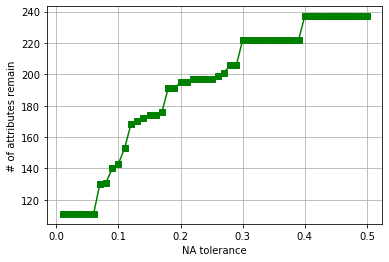

In [202]:
plt.plot(cutoffs_broad, num_attri_remain_broad,'s-',color = 'g',label="NA proportion")
plt.xlabel("NA tolerance")
plt.ylabel("# of attributes remain")
plt.grid()
plt.savefig('/Users/jinchenxie/Desktop/HF_Research/Plots/broader_baseline_NA_cutoffs')
plt.show()

There seems to be a flatten curve from 0.12 - 0.17.  
I would like to take a closer look from 0.12 - 0.17:  
- What attributes are left out from 0.12- 0.17
- Is 0.12 a good choice?

In [203]:
na_attri_12 = baseline_na_series[baseline_na_series>=0.12].index
na_attri_13 = baseline_na_series[baseline_na_series>=0.13].index
na_attri_14 = baseline_na_series[baseline_na_series>=0.14].index
na_attri_15 = baseline_na_series[baseline_na_series>=0.15].index
na_attri_16 = baseline_na_series[baseline_na_series>=0.16].index
na_attri_17 = baseline_na_series[baseline_na_series>=0.17].index
na_attri_20 = baseline_na_series[baseline_na_series>=0.20].index

In [204]:
na_12_13 = [i for i in na_attri_12 if i not in na_attri_13]
na_13_14 = [i for i in na_attri_13 if i not in na_attri_14]
na_14_15 = [i for i in na_attri_14 if i not in na_attri_15]
na_15_16 = [i for i in na_attri_15 if i not in na_attri_16]
na_16_17 = [i for i in na_attri_16 if i not in na_attri_17]
na_17_20 = [i for i in na_attri_17 if i not in na_attri_20]

In [205]:
print(na_12_13,'\n', na_13_14,'\n', na_14_15, '\n',na_15_16,'\n', na_16_17,'\n', na_17_20)

['MR', 'CLOSEST_MR_DAYS'] 
 ['TR', 'CLOSEST_TR_DAYS'] 
 ['RV_FUNC', 'CLOSEST_RV_FUNC_DAYS'] 
 [] 
 ['HOSP_INR', 'PULSE'] 
 ['AR', 'CLOSEST_AR_DAYS', 'PR', 'CLOSEST_PR_DAYS', 'ASA_12', 'WARFARIN_12', 'NOAC_12', 'APT_12', 'BB_12', 'ACE_ARB_12', 'AAD_CLASS_I_12', 'AAD_CLASS_III_12', 'INSULIN_12', 'METFORMIN_12', 'SGLT2_INHIBITORS_12', 'DPP4_INHIBTOR_12', 'TZD_12', 'GLP1_12', 'SULFONYLUREA_12']


Evaluate the several big jumps:  
- 0.17 -> 0.18
- 0.29 -> 0.30
- 0.39 -> 0.40

In [206]:
na_attri_29 = baseline_na_series[baseline_na_series>=0.29].index
na_attri_30 = baseline_na_series[baseline_na_series>=0.30].index
na_attri_18 = baseline_na_series[baseline_na_series>=0.18].index
na_attri_39 = baseline_na_series[baseline_na_series>=0.39].index
na_attri_40 = baseline_na_series[baseline_na_series>=0.40].index

In [207]:
na_29_30 = [i for i in na_attri_29 if i not in na_attri_30]
na_17_18 = [i for i in na_attri_17 if i not in na_attri_18]
na_39_40 = [i for i in na_attri_39 if i not in na_attri_40]

In [208]:
print(na_17_18, '\n', na_29_30, '\n', na_39_40, '\n',)

['ASA_12', 'WARFARIN_12', 'NOAC_12', 'APT_12', 'BB_12', 'ACE_ARB_12', 'AAD_CLASS_I_12', 'AAD_CLASS_III_12', 'INSULIN_12', 'METFORMIN_12', 'SGLT2_INHIBITORS_12', 'DPP4_INHIBTOR_12', 'TZD_12', 'GLP1_12', 'SULFONYLUREA_12'] 
 ['HOSP_BILI', 'ASA_24', 'WARFARIN_24', 'NOAC_24', 'APT_24', 'BB_24', 'ACE_ARB_24', 'AAD_CLASS_I_24', 'AAD_CLASS_III_24', 'INSULIN_24', 'METFORMIN_24', 'SGLT2_INHIBITORS_24', 'DPP4_INHIBTOR_24', 'TZD_24', 'GLP1_24', 'SULFONYLUREA_24'] 
 ['ASA_36', 'WARFARIN_36', 'NOAC_36', 'APT_36', 'BB_36', 'ACE_ARB_36', 'AAD_CLASS_I_36', 'AAD_CLASS_III_36', 'INSULIN_36', 'METFORMIN_36', 'SGLT2_INHIBITORS_36', 'DPP4_INHIBTOR_36', 'TZD_36', 'GLP1_36', 'SULFONYLUREA_36'] 



In [209]:
baseline.shape[1]

289

In [210]:
baseline.shape[1]-len(baseline_na_series[baseline_na_series>=0.15])

174

# drop some unnecessary attributes

In [211]:
baseline_trunc = baseline.drop(columns = ['PRE_VAD', 'PRE_TRANSPLANT'])
baseline_trunc.drop(columns = ['ORD'], inplace=True)

## Drop attributes with >50% missing values for sure. 

In [212]:
drop_attris = list(baseline_na_series[baseline_na_series>=0.50].index)

In [213]:
drop_attris

['AS',
 'CLOSEST_AS_DAYS',
 'MS',
 'CLOSEST_MS_DAYS',
 'PS',
 'CLOSEST_PS_DAYS',
 'TS',
 'CLOSEST_TS_DAYS',
 'PRE_CRT_DAYS',
 'PRE_VAD_DAYS',
 'PRE_TRANSPLANT_DAYS',
 'PRIOR_PCI_DAYS',
 'PRIOR_CABG_DAYS',
 'PRIOR_TAVR_DAYS',
 'PRIOR_SAVR_MECH_DAYS',
 'PRIOR_SAVR_BIO_DAYS',
 'PRIOR_SURG_AO_GRFT_DAYS',
 'PRIOR_ENDO_AO_GRFT_DAYS',
 'PRIOR_AO_VLV_REPAIR_DAYS',
 'PRIOR_SMVR_DAYS',
 'PRIOR_SPVR_DAYS',
 'PRIOR_STVR_DAYS',
 'POST_CRT_DAYS',
 'POST_VAD_DAYS',
 'POST_TRANSPLANT_DAYS',
 'HEMOGLOBIN_A1C',
 'HEMOGLOBIN_A1C_DAYS',
 'CHOLESTEROL',
 'CHOLESTEROL_DAYS',
 'LDL',
 'LDL_DAYS',
 'HDL',
 'HDL_DAYS',
 'TRIGLYCERIDE',
 'TRIGLYCERIDE_DAYS',
 'PREALBUMIN',
 'PREALBUMIN_DAYS',
 'BUN',
 'BUN_DAYS',
 'BLOOD_TYPE',
 'RA_MEAN_PRESSURE',
 'RA_MEAN_PRESSURE_DAYS',
 'THERMAL_CARDIAC_INDEX',
 'THERMAL_CARDIAC_INDEX_DAYS',
 'FICK_CARDIAC_INDEX',
 'FICK_CARDIAC_INDEX_DAYS',
 'PA_SATURATION',
 'PA_SATURATION_DAYS',
 'WEDGE_MEAN_PRESSURE',
 'WEDGE_MEAN_PRESSURE_DAYS',
 'PULM_ART_SYS_PRESSURE',
 'PULM_ART_SY

In [214]:
baseline_trunc.drop(columns = drop_attris, inplace=True)

In [215]:
baseline_trunc.shape

(2521, 234)

New baseline dataset needed to be saved:  
*baseline_trunc: removed attributes with more than 50% missing values*

In [216]:
baseline_trunc_na = baseline_trunc.isna().sum()/baseline_trunc.shape[0]

In [217]:
baseline_trunc_na[baseline_trunc_na>=0.15]
baseline_trunc_na[baseline_trunc_na>=0.15].index

Index(['HOSP_BILI', 'HOSP_INR', 'PULSE', 'AR', 'CLOSEST_AR_DAYS', 'PR',
       'CLOSEST_PR_DAYS', 'ASA_12', 'ASA_24', 'ASA_36', 'WARFARIN_12',
       'WARFARIN_24', 'WARFARIN_36', 'NOAC_12', 'NOAC_24', 'NOAC_36', 'APT_12',
       'APT_24', 'APT_36', 'BB_12', 'BB_24', 'BB_36', 'ACE_ARB_12',
       'ACE_ARB_24', 'ACE_ARB_36', 'AAD_CLASS_I_12', 'AAD_CLASS_I_24',
       'AAD_CLASS_I_36', 'AAD_CLASS_III_12', 'AAD_CLASS_III_24',
       'AAD_CLASS_III_36', 'INSULIN_12', 'INSULIN_24', 'INSULIN_36',
       'METFORMIN_12', 'METFORMIN_24', 'METFORMIN_36', 'SGLT2_INHIBITORS_12',
       'SGLT2_INHIBITORS_24', 'SGLT2_INHIBITORS_36', 'DPP4_INHIBTOR_12',
       'DPP4_INHIBTOR_24', 'DPP4_INHIBTOR_36', 'TZD_12', 'TZD_24', 'TZD_36',
       'GLP1_12', 'GLP1_24', 'GLP1_36', 'SULFONYLUREA_12', 'SULFONYLUREA_24',
       'SULFONYLUREA_36', 'ALBUMIN', 'ALBUMIN_DAYS', 'BNP', 'BNP_DAYS', 'BILI',
       'BILI_DAYS', 'INR', 'INR_DAYS', 'CLOSEST_MELD', 'VERIFIED_MELD',
       'MELD_EST_MORTALITY'],
      dtype='obj

## drop prescription related attributes

Out of the attributes left out at 15% missing value tolerance cutoff,  
there are __ related to prescriptions 12, 24, 36 months after office visit.

In [218]:
prescription_12_24_36 = ['ASA_12', 'ASA_24', 'ASA_36', 'WARFARIN_12',
       'WARFARIN_24', 'WARFARIN_36', 'NOAC_12', 'NOAC_24', 'NOAC_36', 'APT_12',
       'APT_24', 'APT_36', 'BB_12', 'BB_24', 'BB_36', 'ACE_ARB_12',
       'ACE_ARB_24', 'ACE_ARB_36', 'AAD_CLASS_I_12', 'AAD_CLASS_I_24',
       'AAD_CLASS_I_36', 'AAD_CLASS_III_12', 'AAD_CLASS_III_24',
       'AAD_CLASS_III_36', 'INSULIN_12', 'INSULIN_24', 'INSULIN_36',
       'METFORMIN_12', 'METFORMIN_24', 'METFORMIN_36', 'SGLT2_INHIBITORS_12',
       'SGLT2_INHIBITORS_24', 'SGLT2_INHIBITORS_36', 'DPP4_INHIBTOR_12',
       'DPP4_INHIBTOR_24', 'DPP4_INHIBTOR_36', 'TZD_12', 'TZD_24', 'TZD_36',
       'GLP1_12', 'GLP1_24', 'GLP1_36', 'SULFONYLUREA_12', 'SULFONYLUREA_24',
       'SULFONYLUREA_36']

I think it's sufficient to only include the presciption on the day of office visit. 
prescription 3, 6, 12, 24, 36 months after visit is not static feature anymore, and need to be carefully evaluate where they lie on each patient's timeline, which is highly variable. 

So, as now, I remove these prescription attributes (_12, _24, _36) first. 

In [219]:
baseline_trunc.drop(columns = prescription_12_24_36, inplace=True)

In [220]:
baseline_trunc.shape

(2521, 189)

In [221]:
baseline_trunc_na = baseline_trunc.isna().sum()/baseline_trunc.shape[0]
baseline_trunc_na[baseline_trunc_na>=0.15].index

Index(['HOSP_BILI', 'HOSP_INR', 'PULSE', 'AR', 'CLOSEST_AR_DAYS', 'PR',
       'CLOSEST_PR_DAYS', 'ALBUMIN', 'ALBUMIN_DAYS', 'BNP', 'BNP_DAYS', 'BILI',
       'BILI_DAYS', 'INR', 'INR_DAYS', 'CLOSEST_MELD', 'VERIFIED_MELD',
       'MELD_EST_MORTALITY'],
      dtype='object')

In [222]:
baseline_trunc[baseline_trunc_na[baseline_trunc_na>=0.20].index].isna().sum()/baseline_trunc.shape[0]

HOSP_BILI             0.291551
ALBUMIN               0.261008
ALBUMIN_DAYS          0.261008
BNP                   0.258231
BNP_DAYS              0.258231
BILI                  0.279651
BILI_DAYS             0.279651
INR                   0.213011
INR_DAYS              0.213011
CLOSEST_MELD          0.274098
VERIFIED_MELD         0.274098
MELD_EST_MORTALITY    0.274098
dtype: float64

In [223]:
prescription_03_06 = ['ASA_03', 'ASA_06', 'WARFARIN_03',
       'WARFARIN_06', 'NOAC_03', 'NOAC_06', 'APT_03',
       'APT_06', 'BB_03', 'BB_06', 'ACE_ARB_03',
       'ACE_ARB_06', 'AAD_CLASS_I_03', 'AAD_CLASS_I_06',
       'AAD_CLASS_III_03', 'AAD_CLASS_III_06',
       'INSULIN_03', 'INSULIN_06',
       'METFORMIN_03', 'METFORMIN_06', 'SGLT2_INHIBITORS_03',
       'SGLT2_INHIBITORS_06', 'DPP4_INHIBTOR_03',
       'DPP4_INHIBTOR_06', 'TZD_03', 'TZD_06',
       'GLP1_03', 'GLP1_06', 'SULFONYLUREA_03', 'SULFONYLUREA_06']

In [224]:
baseline_trunc.drop(columns = prescription_03_06, inplace=True)

In [225]:
baseline_trunc.shape

(2521, 159)

In [226]:
baseline_trunc_na = baseline_trunc.isna().sum()/baseline_trunc.shape[0]
baseline_trunc[baseline_trunc_na[baseline_trunc_na>=0.15].index].isna().sum()/baseline_trunc.shape[0]

HOSP_BILI             0.291551
HOSP_INR              0.161444
PULSE                 0.162237
AR                    0.191987
CLOSEST_AR_DAYS       0.191987
PR                    0.194367
CLOSEST_PR_DAYS       0.194367
ALBUMIN               0.261008
ALBUMIN_DAYS          0.261008
BNP                   0.258231
BNP_DAYS              0.258231
BILI                  0.279651
BILI_DAYS             0.279651
INR                   0.213011
INR_DAYS              0.213011
CLOSEST_MELD          0.274098
VERIFIED_MELD         0.274098
MELD_EST_MORTALITY    0.274098
dtype: float64

In [227]:
baseline_trunc[baseline_trunc_na[baseline_trunc_na>=0.20].index].isna().sum()/baseline_trunc.shape[0]

HOSP_BILI             0.291551
ALBUMIN               0.261008
ALBUMIN_DAYS          0.261008
BNP                   0.258231
BNP_DAYS              0.258231
BILI                  0.279651
BILI_DAYS             0.279651
INR                   0.213011
INR_DAYS              0.213011
CLOSEST_MELD          0.274098
VERIFIED_MELD         0.274098
MELD_EST_MORTALITY    0.274098
dtype: float64

## drop attributes >20% or >30% missing values
baseline_trunc_20

### What attributes are dropped from 0.18 - 0.29

In [228]:
cutoffs = np.arange(18,30)/100

In [229]:
for i in range(len(cutoffs)-1):
    na_attri_s = baseline_na_series[baseline_na_series>=cutoffs[i]].index
    na_attri_l = baseline_na_series[baseline_na_series>=cutoffs[i+1]].index
    na_s_l = [i for i in na_attri_s if i not in na_attri_l]
    print(cutoffs[i], 'to', cutoffs[i+1],':', na_s_l)

0.18 to 0.19 : []
0.19 to 0.2 : ['AR', 'CLOSEST_AR_DAYS', 'PR', 'CLOSEST_PR_DAYS']
0.2 to 0.21 : []
0.21 to 0.22 : ['INR', 'INR_DAYS']
0.22 to 0.23 : []
0.23 to 0.24 : []
0.24 to 0.25 : []
0.25 to 0.26 : ['BNP', 'BNP_DAYS']
0.26 to 0.27 : ['ALBUMIN', 'ALBUMIN_DAYS']
0.27 to 0.28 : ['BILI', 'BILI_DAYS', 'CLOSEST_MELD', 'VERIFIED_MELD', 'MELD_EST_MORTALITY']
0.28 to 0.29 : []


Drop attributes with >20% missing values. 

In [230]:
baseline_trunc.drop(columns = ['CLOSEST_MELD', 'MELD_EST_MORTALITY'], inplace=True)

In [231]:
baseline_na_trunc_series = baseline_trunc.isna().sum()/baseline_trunc.shape[0]

In [232]:
drop_attris_20 = list(baseline_na_trunc_series[baseline_na_trunc_series>=0.20].index)

In [244]:
drop_attris_20

['HOSP_BILI',
 'ALBUMIN',
 'ALBUMIN_DAYS',
 'BNP',
 'BNP_DAYS',
 'BILI',
 'BILI_DAYS',
 'INR',
 'INR_DAYS',
 'VERIFIED_MELD']

In [245]:
drop_attris_30 = list(baseline_na_trunc_series[baseline_na_trunc_series>=0.30].index)

In [246]:
drop_attris_30

[]

## drop "POST_" attributes

POST_CRT   
POST_VAD 
POST_TRANSPLANT

These 3 attributes are varied with admissions and are not static.  
Moreover, the information are contained in admission dataset already. 

In [236]:
post_attris = ['POST_CRT', 'POST_VAD', 'POST_TRANSPLANT']

In [237]:
baseline_trunc.drop(columns = post_attris, inplace=True)
baseline_trunc.shape

(2521, 154)

## drop unnecessary attributres

In [238]:
drop_attris_2 = ['AGE_OFFICE_VISIT', 'ETHNIC_GROUP', 'TOBACCO_STATUS', 
                 'HF_ETIOLOGY','CCI_MALIG_NO_SKIN',
                 'CCI_SEVERE_LIVER_DISEASE', 'CCI_MATASTATIC_TUMOR']

In [239]:
baseline_trunc.drop(columns = drop_attris_2, inplace=True)

In [240]:
baseline_trunc.drop(columns = ['WEIGHT_KG'], inplace=True)

In [241]:
baseline_trunc.drop(columns = ['total_adms'], inplace=True)

In [265]:
baseline_trunc.drop(columns = ['AGE_CENSOR'], inplace=True)

In [278]:
baseline_trunc.drop(columns = ['DEPARTMENT_NAME', 'EXTERNAL_DEPARTMENT_NAME'], inplace=True)

## NA tolerance 0.20 and 0.30


In [279]:
baseline_trunc20 = baseline_trunc.drop(columns = drop_attris_20)

In [280]:
baseline_trunc20.shape

(2521, 132)

In [281]:
baseline_trunc30 = baseline_trunc.drop(columns = drop_attris_30)

In [282]:
baseline_trunc30.shape

(2521, 142)

## drop "_DAYS" attributes for now

In [283]:
days_office_visit = ['WBC_DAYS','HGB_DAYS','CR_DAYS','EGFR_DAYS',
                    'K_DAYS','NA_DAYS','GLUCOSE_DAYS','PLATELETS_DAYS',
                    'HCT_DAYS']

In [284]:
baseline_trunc20_noday = baseline_trunc20.drop(columns = days_office_visit)

In [285]:
baseline_trunc30_noday = baseline_trunc30.drop(columns = days_office_visit)

# Save 'Filtered Attrributes Baseline' excel file

In [286]:
%cd ~/desktop/HF_Research/datasets/processed

/Users/jinchenxie/Desktop/HF_Research/datasets/processed


In [287]:
writer = pd.ExcelWriter('Filtered Attributes Baseline.xlsx')
baseline_trunc20.to_excel(writer, 'NA20_filtered_baseline', index=False)
baseline_trunc30.to_excel(writer, 'NA30_filtered_baseline', index=False)
baseline_trunc20_noday.to_excel(writer, 'NA20_filtered_baseline_noDays', index=False)
baseline_trunc30_noday.to_excel(writer, 'NA30_filtered_baseline_noDays', index=False)
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


# Proportion needs to be imputed

In [103]:
trunc20_na_series = baseline_trunc20.isna().sum()/baseline_trunc20.shape[0]

In [125]:
len(trunc20_na_series[trunc20_na_series<=0.30].index)

135

In [126]:
trunc30_na_series = baseline_trunc30.isna().sum()/baseline_trunc30.shape[0]

In [127]:
len(trunc30_na_series[trunc30_na_series <=0.30].index)

147

In [288]:
baseline_trunc20['HOSP_ROLLUP_GROUPING2']

0       Commercial
1         Medicare
2         Medicare
3         Medicare
4         Medicare
           ...    
2516    Commercial
2517      Medicaid
2518      Medicaid
2519      Medicare
2520      Medicare
Name: HOSP_ROLLUP_GROUPING2, Length: 2521, dtype: object